In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate

In [3]:
df = pd.read_csv('data.csv')
df.head()

,RPM,Padm,Pdis,SN,SC,Torque,Ht,Nh,Nm,Eff
0,1800,-0.01,0.12,35.80,10.90,0.35,1.52,2.71,66.20,4.10
1,1800,-0.01,0.13,33.75,9.98,0.34,1.58,2.57,63.44,4.05
2,1800,-0.01,0.14,33.60,9.91,0.35,1.69,2.74,66.03,4.15
3,1800,-0.01,0.16,31.01,8.79,0.35,1.81,2.60,66.00,3.94
4,2200,-0.04,0.15,40.12,12.93,0.38,2.09,4.42,88.30,5.01


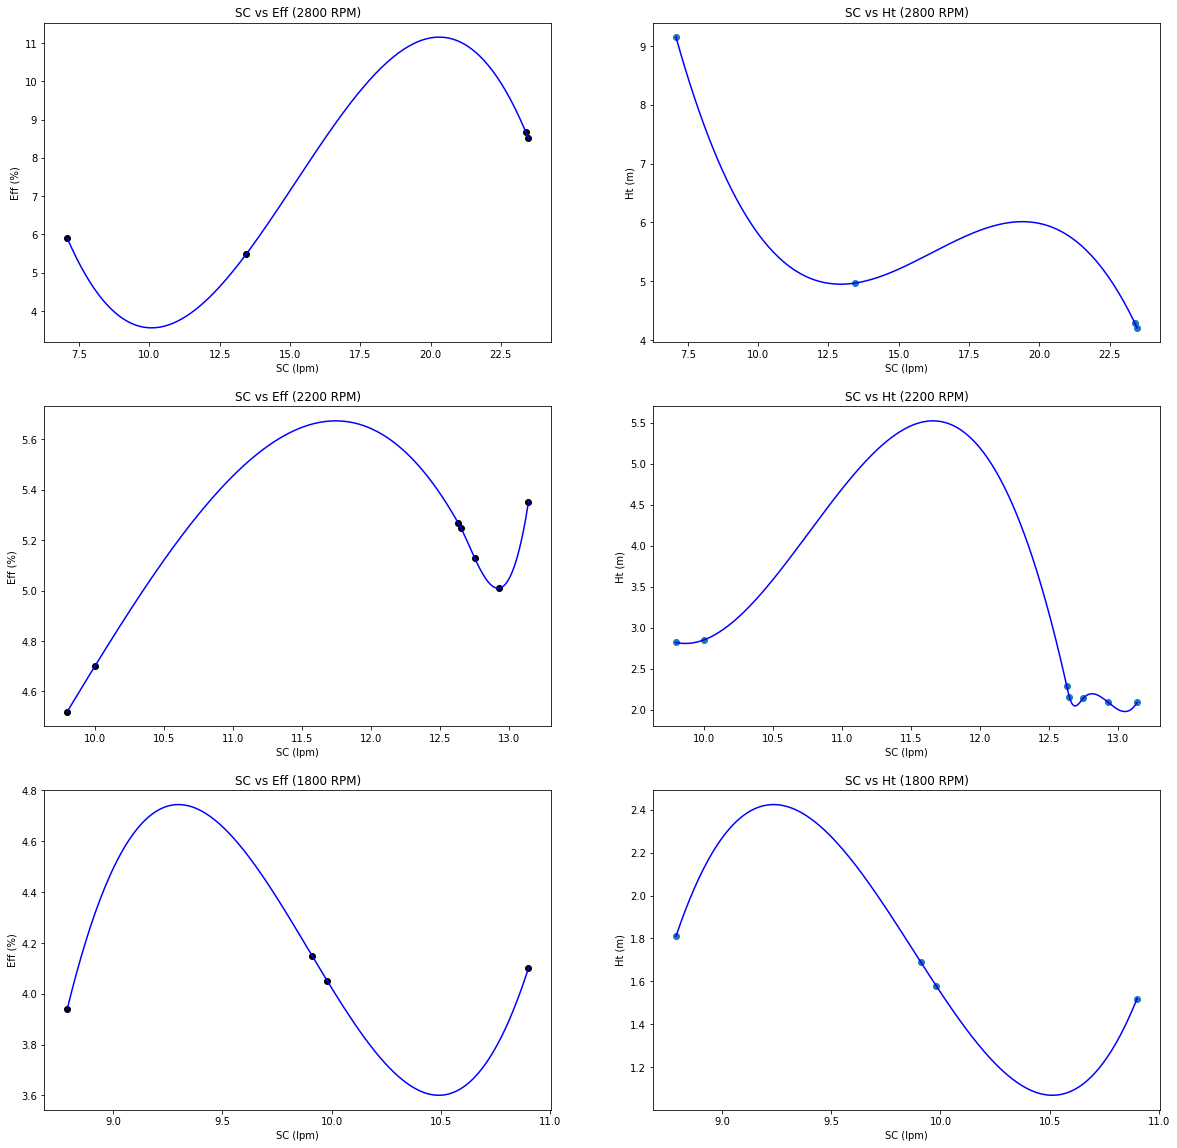

In [13]:
df = df.sort_values(by='SC', ascending=False)

rpm_list = df['RPM'].unique()

fig, ax = plt.subplots(len(rpm_list), 2, figsize=(20, 20))

for idx, rpm in enumerate(rpm_list):
    df_rpm = df.loc[df['RPM'] == rpm]

    x_inter = np.linspace(df_rpm['SC'].min(), df_rpm['SC'].max(), 300)
    spline_eff = interpolate.interp1d(df_rpm['SC'], df_rpm['Eff'], kind='cubic')
    y_inter_eff = spline_eff(x_inter)

    ax[idx][0].set_title(f'SC vs Eff ({rpm} RPM)')
    ax[idx][0].set_xlabel('SC (lpm)')
    ax[idx][0].set_ylabel('Eff (%)')
    ax[idx][0].plot(df_rpm['SC'], df_rpm['Eff'], 'ok')
    ax[idx][0].plot(x_inter, y_inter_eff, '-b')

    spline_ht = interpolate.interp1d(df_rpm['SC'], df_rpm['Ht'], kind='cubic')
    y_inter_ht = spline_ht(x_inter)

    ax[idx][1].set_title(f'SC vs Ht ({rpm} RPM)')
    ax[idx][1].set_xlabel('SC (lpm)')
    ax[idx][1].set_ylabel('Ht (m)')
    ax[idx][1].plot(df_rpm['SC'], df_rpm['Ht'], 'o')
    ax[idx][1].plot(x_inter, y_inter_ht, '-b')
